# Naive Bayes Classification

August 2021

Updated January 2022


Naive Bayes rely on Bayes's theorem, named after Thomas Bayes, and which describes the probability of an event, based on prior knowledge of conditions. 

Naive Bayes classifiers assume strong, or "naive," independence between attributes of data points. Popular uses of naive Bayes classifiers include spam filters, text analysis and medical diagnosis. These classifiers are widely used for machine learning because they are simple to implement.

The sample below attempts a quick intro to Naive Bayes classification using SKLearn libraries.


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

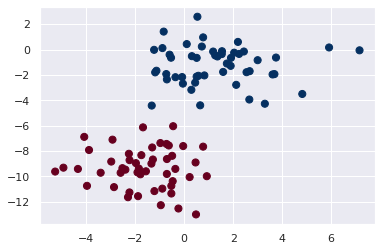

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

## Gaussian

Gaussian Naive Bayes is a variant of Naive Bayes that assumes Gaussian normal distribution - this assumption of course means the final classification will only be as good as the model assumptions that lead to it, which is why Gaussian naive Bayes often does not produce very good results in practice.

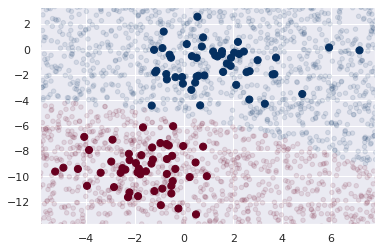

In [3]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

In [4]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

## Multinomial Bayes

Multinomial Naive Bayes algorithm is a probabilistic learning method that is mostly used in Natural Language Processing (NLP). The algorithm is based on the Bayes theorem and predicts the tag of a text such as a piece of email or newspaper article. It calculates the probability of each tag for a given sample and then gives the tag with the highest probability as output.

More here -> https://www.upgrad.com/blog/multinomial-naive-bayes-explained/


In [5]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [6]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [7]:
# In order to use this data for machine learning, we need to be able to convert the content of each string into a vector of numbers, using TF-IDF vectorizer - see references below for more info
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(train.data, train.target)
labels = model.predict(test.data)

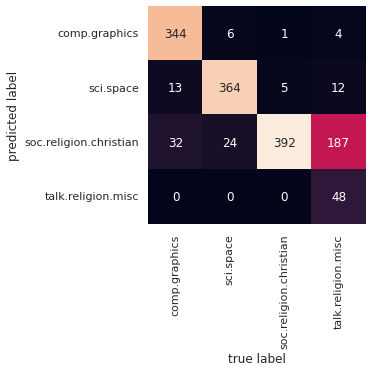

In [8]:
# Let's see now the performance of the estimator
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [9]:
# Quick def to predict from a string
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [10]:
predict_category('sending a payload to outer space')

'sci.space'

In [11]:
predict_category('debate buddhism vs islam')

'soc.religion.christian'

In [12]:
predict_category('determining the screen retina display')

'comp.graphics'

## Concluding, several Advantages, one Disadvantage

- Extremely fast for both training and prediction
- Provide straightforward probabilistic prediction
- Often very easily interpretable
- Few (if any) tunable parameters
- One caveat - Naive Bayes assumes that all predictors (or features) are independent, rarely happening in real life


References

https://en.wikipedia.org/wiki/Bayes%27_theorem

https://towardsdatascience.com/naive-bayes-classifier-81d512f50a7c

https://medium.com/@cmukesh8688/tf-idf-vectorizer-scikit-learn-dbc0244a911a

https://holypython.com/nbc/naive-bayes-pros-cons/